In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from pylab import rcParams
#Size of plt.plot fig
rcParams['figure.figsize'] = 15, 5
df = pd.read_csv('gold_price.csv',parse_dates = True,index_col = 'Date')


In [ ]:
df.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


In [ ]:
df.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01'],
              dtype='datetime64[ns]', name='Date', length=842, freq=None)

In [ ]:
data = df['Price']

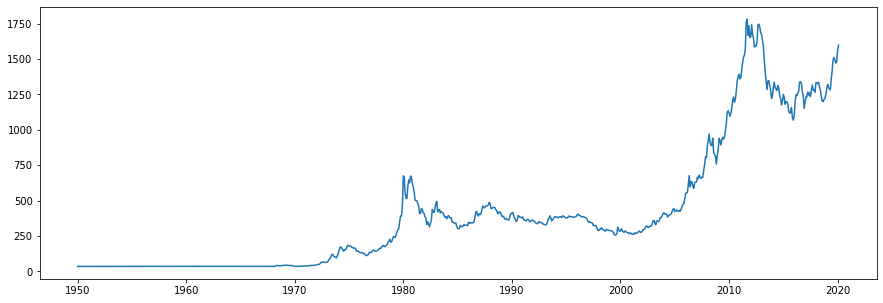

In [ ]:
plt.plot(data)

In [ ]:
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label ='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


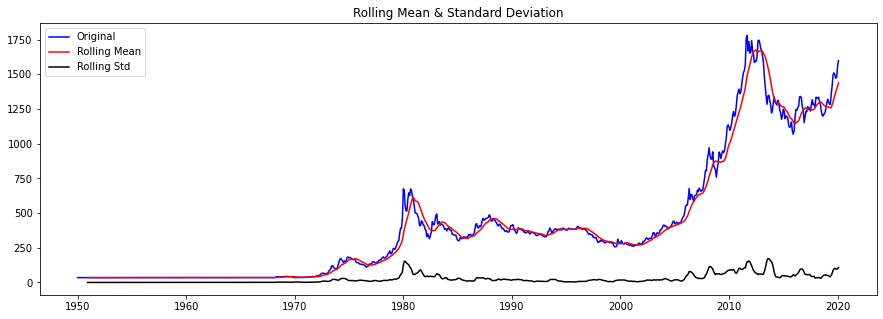

Results of Dickey-Fuller Test:
Test Statistic                   0.293307
p-value                          0.977035
#Lags Used                      11.000000
Number of Observations Used    830.000000
Critical Value (1%)             -3.438253
Critical Value (5%)             -2.865029
Critical Value (10%)            -2.568628
dtype: float64


In [ ]:
test_stationarity(data)

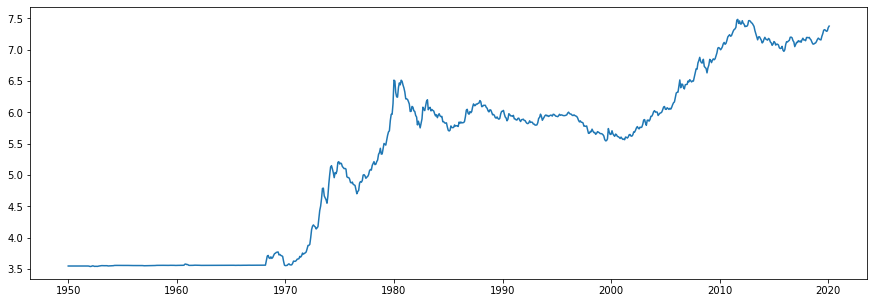

In [ ]:
data_log = np.log(data)
plt.plot(data_log)

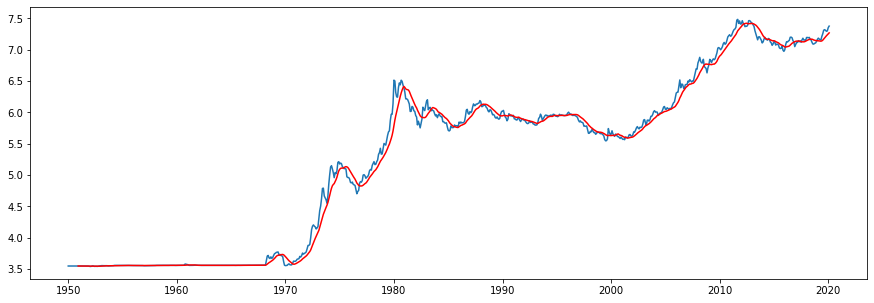

In [ ]:
moving_avg = data_log.rolling(12).mean()
plt.plot(data_log)
plt.plot(moving_avg, color='red')

In [ ]:
data_moving_avg_diff = data_log - moving_avg
data_moving_avg_diff.head(12)

Date
1950-01-01         NaN
1950-02-01         NaN
1950-03-01         NaN
1950-04-01         NaN
1950-05-01         NaN
1950-06-01         NaN
1950-07-01         NaN
1950-08-01         NaN
1950-09-01         NaN
1950-10-01         NaN
1950-11-01         NaN
1950-12-01   -0.000264
Name: Price, dtype: float64

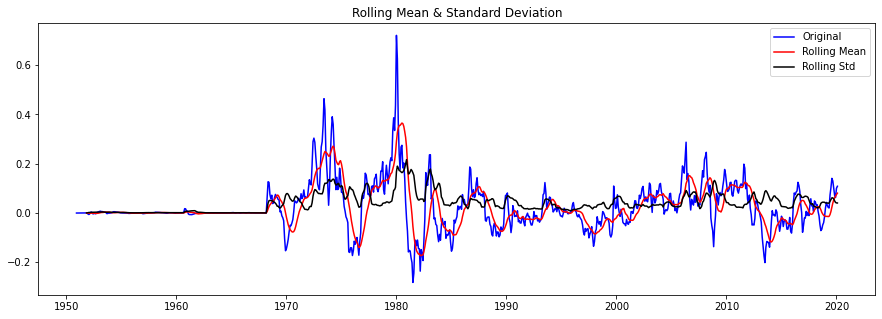

Results of Dickey-Fuller Test:
Test Statistic                -5.973761e+00
p-value                        1.908918e-07
#Lags Used                     1.100000e+01
Number of Observations Used    8.190000e+02
Critical Value (1%)           -3.438360e+00
Critical Value (5%)           -2.865075e+00
Critical Value (10%)          -2.568653e+00
dtype: float64


In [ ]:
data_moving_avg_diff.dropna(inplace=True)
test_stationarity(data_moving_avg_diff)


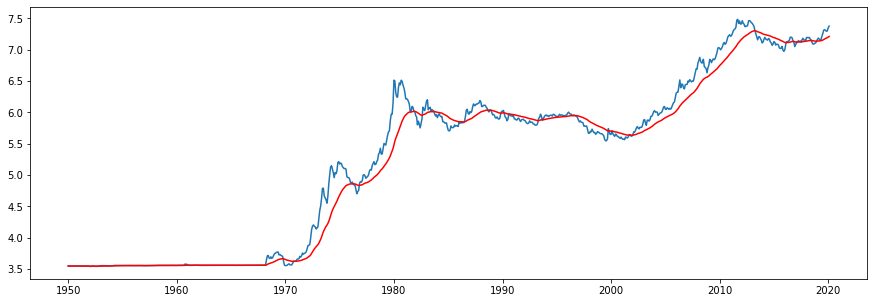

In [ ]:
expweighted_mavg = data_log.ewm(halflife =12).mean()
plt.plot(data_log)
plt.plot(expweighted_mavg, color='red')

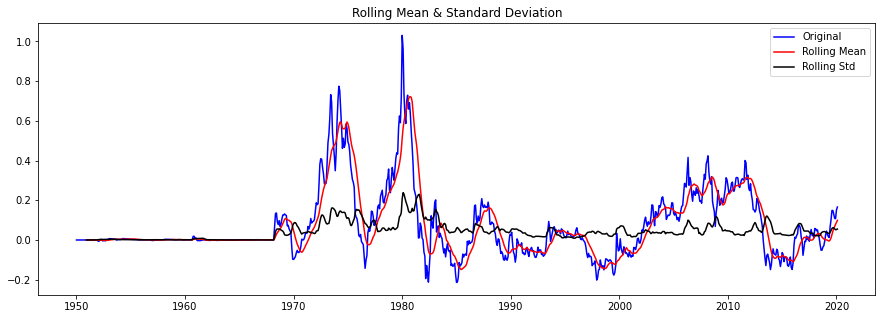

Results of Dickey-Fuller Test:
Test Statistic                  -4.743477
p-value                          0.000070
#Lags Used                      11.000000
Number of Observations Used    830.000000
Critical Value (1%)             -3.438253
Critical Value (5%)             -2.865029
Critical Value (10%)            -2.568628
dtype: float64


In [ ]:
data_log_ewma_diff = data_log - expweighted_mavg
test_stationarity(data_log_ewma_diff)

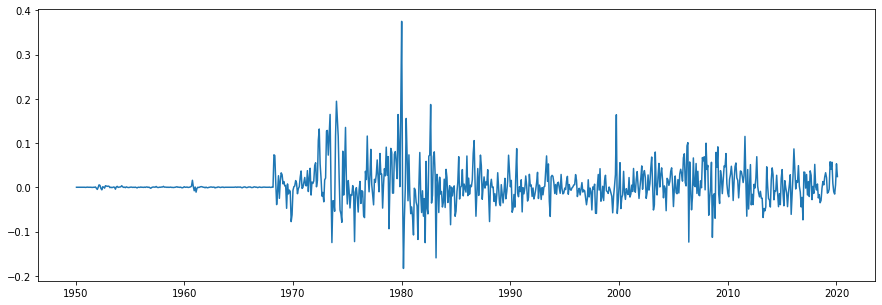

In [ ]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)


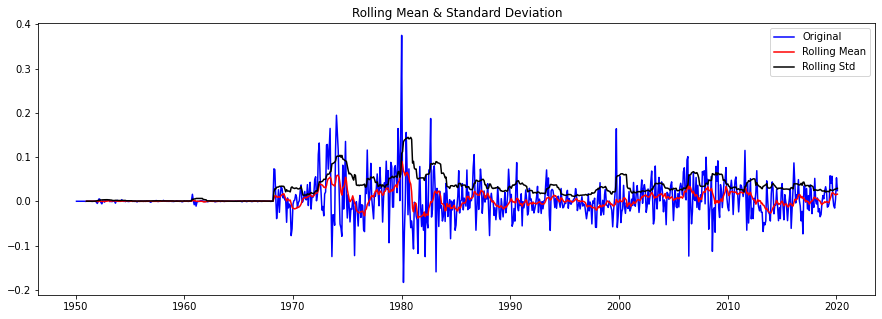

Results of Dickey-Fuller Test:
Test Statistic                -5.910321e+00
p-value                        2.648281e-07
#Lags Used                     1.700000e+01
Number of Observations Used    8.230000e+02
Critical Value (1%)           -3.438321e+00
Critical Value (5%)           -2.865058e+00
Critical Value (10%)          -2.568643e+00
dtype: float64


In [ ]:
data_log_diff.dropna(inplace=True)
test_stationarity(data_log_diff)

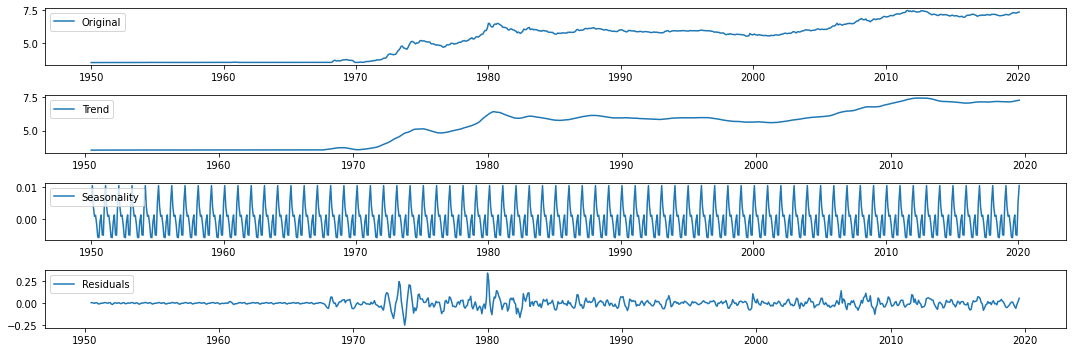

In [ ]:
decomposing = seasonal_decompose(data_log)
trend = decomposing.trend
seasonal = decomposing.seasonal
residual = decomposing.resid
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

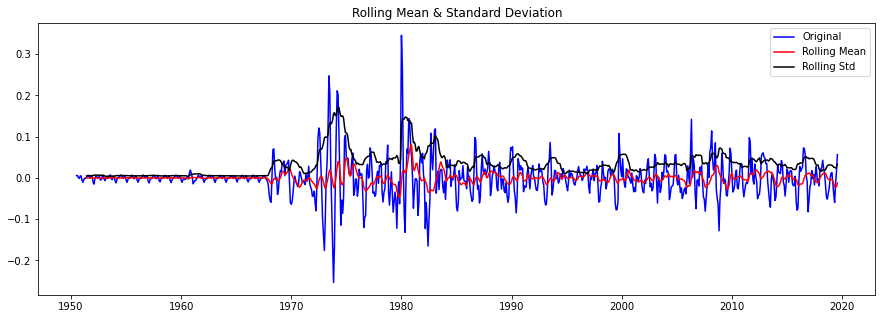

Results of Dickey-Fuller Test:
Test Statistic                -9.360619e+00
p-value                        7.841217e-16
#Lags Used                     1.700000e+01
Number of Observations Used    8.120000e+02
Critical Value (1%)           -3.438429e+00
Critical Value (5%)           -2.865106e+00
Critical Value (10%)          -2.568669e+00
dtype: float64


In [ ]:
data_log_decompose = residual
data_log_decompose.dropna(inplace=True)
test_stationarity(data_log_decompose)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(0.0, 5.0)

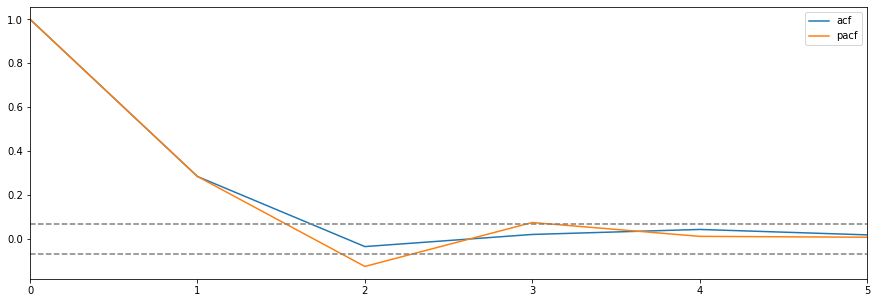

In [ ]:
lag_acf = acf(data_log_diff, nlags =20)
lag_pacf = pacf(data_log_diff, nlags=20, method ='ols')
plt.plot(lag_acf, label='acf')
plt.plot(lag_pacf, label='pacf')
plt.legend(loc='upper right')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diff)),linestyle='--',color='gray')
# We set the range from 0 to 5 after analising thefull chart, to find the exact number
#for acf and pacf where it crosses the confidence limits
plt.xlim([0,5])


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Text(0.5, 1.0, 'RSS: 1.2678')

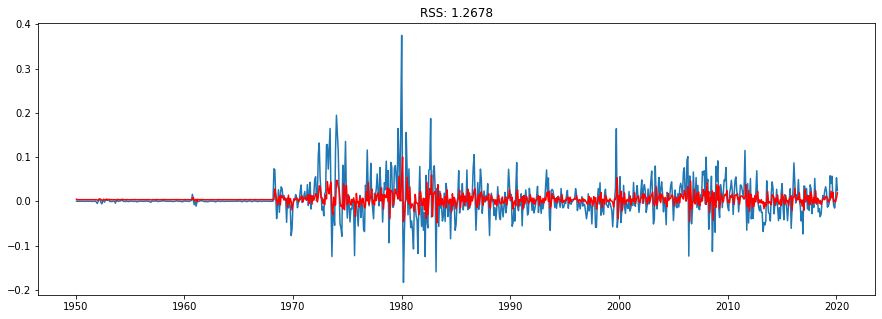

In [ ]:
model = ARIMA(data_log, order = (1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-data_log_diff)**2))

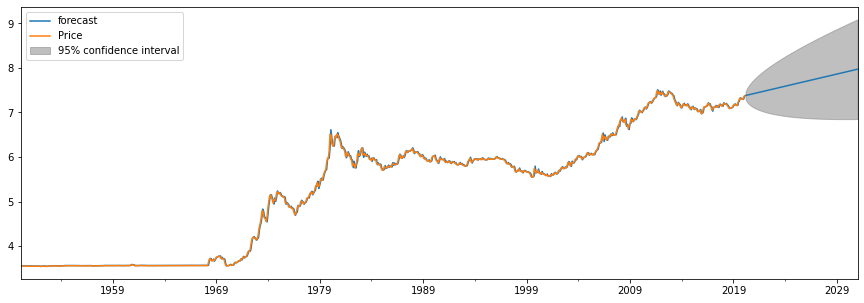

In [ ]:
results_ARIMA.plot_predict(1,972)
plt.legend(loc='upper left')

In [ ]:
#Re-Scaling

In [ ]:
predicted_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy =True)
predicted_ARIMA_diff.head()

Date
1950-02-01    0.004552
1950-03-01    0.003269
1950-04-01    0.003694
1950-05-01    0.003469
1950-06-01    0.003569
dtype: float64

In [ ]:
predicted_ARIMA_diff_cumsum = predicted_ARIMA_diff.cumsum()
predicted_ARIMA_diff_cumsum.head()

Date
1950-02-01    0.004552
1950-03-01    0.007821
1950-04-01    0.011516
1950-05-01    0.014985
1950-06-01    0.018553
dtype: float64

In [ ]:
predictions_ARIMA_log = pd.Series(data_log.iloc[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predicted_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
1950-01-01    3.547604
1950-02-01    3.552156
1950-03-01    3.555425
1950-04-01    3.559119
1950-05-01    3.562588
dtype: float64

Text(0.5, 1.0, 'RMSE: 140.4284')

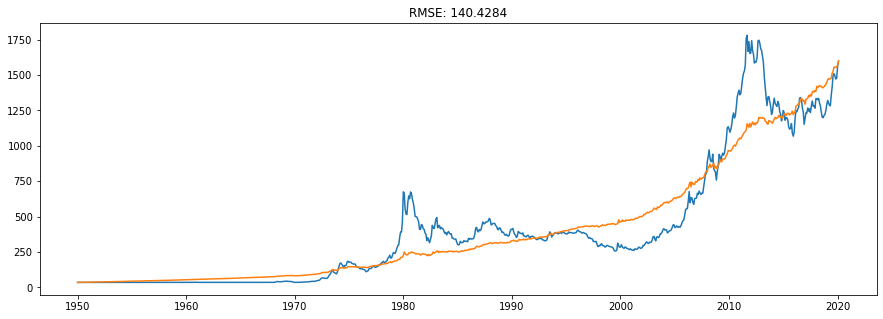

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data)**2)/len(data)))

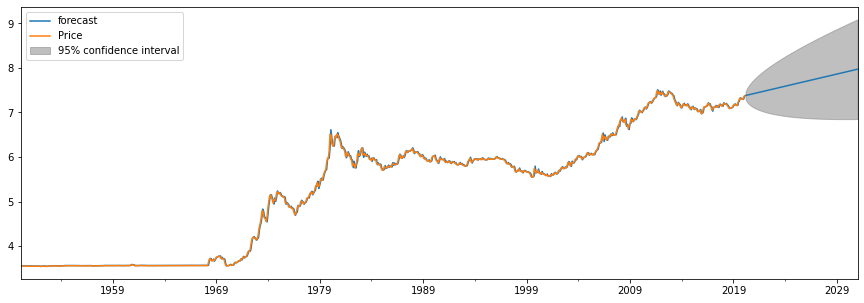

In [ ]:
# Now let's forecast the next year
results_ARIMA.plot_predict(1,972)
plt.legend(loc='upper left')